## Visualization for Dask Expiriment Data
https://arxiv.org/pdf/1711.00489.pdf

In [1]:
import pandas as pd
import os

In [2]:
os.getcwd()

'/home/ubuntu/adadamp-experiments/exp-dask'

In [3]:
exp1_file = './stats/increasing-bs/exp-v2--final.csv'
exp1_stats = pd.read_csv(exp1_file)

In [4]:
def plot(stats, x_lbl, y_lbl, x_title, y_title, title):
    """
    Train loss vs epochs
    """
    ax = exp1_stats.plot(x=x_lbl, y=y_lbl)
    ax.set_xlim(0, None)
    ax.set_xlabel(x_title)
    ax.set_ylabel(y_title)
    ax.set_title(title)

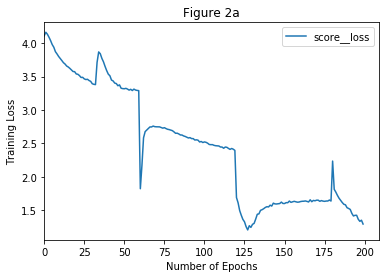

In [5]:
plot(exp1_stats, 'epoch', 'score__loss', 'Number of Epochs', 'Training Loss', 'Figure 2a')

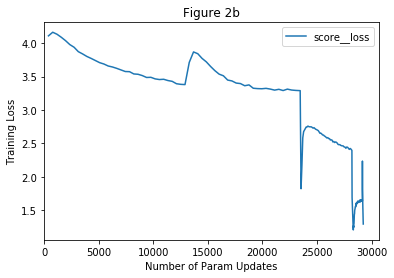

In [6]:
plot(exp1_stats, 'n_updates', 'score__loss', 'Number of Param Updates', 'Training Loss', 'Figure 2b')

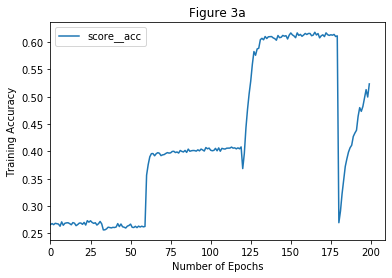

In [7]:
plot(exp1_stats, 'epoch', 'score__acc', 'Number of Epochs', 'Training Accuracy', 'Figure 3a')

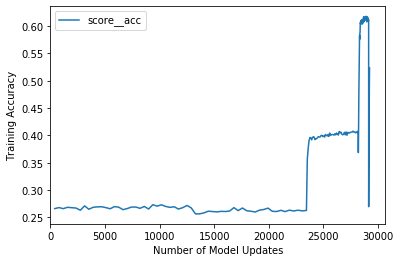

In [8]:
plot(exp1_stats, 'n_updates', 'score__acc', 'Number of Model Updates', 'Training Accuracy', '')